In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [3]:
df=pd.read_csv(r'C:\Users\user\Desktop\workspace\ML practice\Datasets\titanic_toy.csv')

In [4]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [13]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
[column for column in df.columns if df[column].isnull().mean()<0.05 and df[column].isnull().mean()>=0]

['Family', 'Survived']

In [15]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [17]:
x_train.isnull().mean()

Age       0.199037
Fare      0.048154
Family    0.000000
dtype: float64

In [19]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

In [21]:
mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [22]:
x_train['Age_mean']=x_train['Age'].fillna(mean_age)
x_train['Age_median']=x_train['Age'].fillna(median_age)

In [24]:
x_train['Fare_mean']=x_train['Fare'].fillna(mean_fare)
x_train['Fare_median']=x_train['Fare'].fillna(median_fare)

In [25]:
x_train

,Age,Fare,Family,Age_mean,Age_median,Fare_median,Fare_mean
445,4.0,81.8583,2,4.000000,4.0,81.8583,81.858300
650,NaN,7.8958,0,29.256353,28.0,7.8958,7.895800
172,1.0,11.1333,2,1.000000,1.0,11.1333,11.133300
450,36.0,27.7500,3,36.000000,36.0,27.7500,27.750000
314,43.0,26.2500,2,43.000000,43.0,26.2500,26.250000
...,...,...,...,...,...,...,...
106,21.0,7.6500,0,21.000000,21.0,7.6500,7.650000
270,NaN,31.0000,0,29.256353,28.0,31.0000,31.000000
860,41.0,NaN,2,41.000000,41.0,14.4542,31.798348
435,14.0,120.0000,3,14.000000,14.0,120.0000,120.000000


In [26]:
x_train.corr()

,Age,Fare,Family,Age_mean,Age_median,Fare_median,Fare_mean
Age,1.000000,0.088197,-0.310167,1.000000,1.000000,0.083017,0.085804
Fare,0.088197,1.000000,0.205140,0.084564,0.088616,1.000000,1.000000
Family,-0.310167,0.205140,1.000000,-0.246123,-0.245186,0.203157,0.203104
Age_mean,1.000000,0.084564,-0.246123,1.000000,0.999258,0.080023,0.082658
Age_median,1.000000,0.088616,-0.245186,0.999258,1.000000,0.083857,0.086607
Fare_median,0.083017,1.000000,0.203157,0.080023,0.083857,1.000000,0.997291
Fare_mean,0.085804,1.000000,0.203104,0.082658,0.086607,0.997291,1.000000


In [27]:
print('norm','mean','median',x_train['Age'].var(),x_train['Age_mean'].var(),x_train['Age_median'].var())

norm mean median 211.95188064643307 169.69780797736954 169.94984651902135


In [28]:
print('norm','mean','median',x_train['Fare'].var(),x_train['Fare_mean'].var(),x_train['Fare_median'].var())

norm mean median 2666.9296723129796 2538.2996238091378 2552.1099348908224


<AxesSubplot:ylabel='Density'>

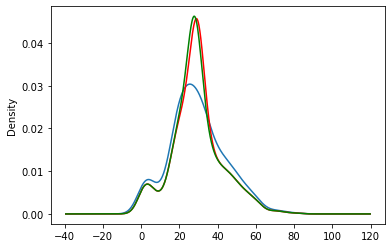

In [29]:
fig=plt.figure()
ax=fig.add_subplot(111)
x_train['Age'].plot(kind='kde',ax=ax)
x_train['Age_mean'].plot(kind='kde',ax=ax,color='red')
x_train['Age_median'].plot(kind='kde',ax=ax,color='green')

<AxesSubplot:ylabel='Density'>

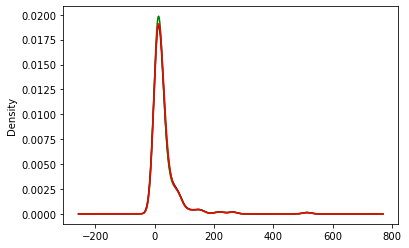

In [31]:
fig=plt.figure()
ax=fig.add_subplot(111)

x_train['Fare'].plot(kind='kde',ax=ax,color='black')
x_train['Fare_median'].plot(kind='kde',ax=ax,color='green')
x_train['Fare_mean'].plot(kind='kde',ax=ax,color='red')

<AxesSubplot:>

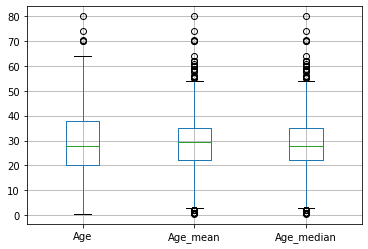

In [33]:
x_train[['Age','Age_mean','Age_median']].boxplot()

In [36]:
x.head()

,Age,Fare,Family
0,22.0,7.2500,1
1,38.0,71.2833,1
2,26.0,7.9250,0
3,35.0,53.1000,1
4,35.0,8.0500,0


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='median')

In [38]:
trf=ColumnTransformer([
    ('imputer1',imputer1,[0]),
    ('imputer2',imputer2,[1])
],remainder='passthrough')

In [39]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [40]:
trf.named_transformers_['imputer1'].statistics_

array([28.])

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression()

In [44]:
model.fit(x_train_trf,y_train)

LogisticRegression()

In [46]:
y_pred=model.predict(x_test_trf)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
accuracy_score(y_test,y_pred)

0.6567164179104478